In [2]:
# import the library
# kernel must be [conda env:gl-env]
import graphlab as gl

In [3]:
import os
import urllib

##  Import data for the songs
songs = gl.SFrame.read_csv("../data/song_data.csv")

This non-commercial license of GraphLab Create for academic use is assigned to jnizzi@smu.edu and will expire on August 05, 2018.


[INFO] graphlab.cython.cy_server: GraphLab Create v2.1 started. Logging: C:\Users\nizzi\AppData\Local\Temp\graphlab_server_1503189898.log.0


Finished parsing file C:\Users\nizzi\Documents\DataMiningProj\SMU-data-mining\data\song_data.csv

Parsing completed. Parsed 100 lines in 1.75078 secs.

------------------------------------------------------
Inferred types from first 100 line(s) of file as 
column_type_hints=[str,str,str,str,long]
If parsing fails due to incorrect types, you can correct
the inferred type list above and pass it to read_csv in
the column_type_hints argument
------------------------------------------------------


Read 637410 lines. Lines per second: 363742

Finished parsing file C:\Users\nizzi\Documents\DataMiningProj\SMU-data-mining\data\song_data.csv

Parsing completed. Parsed 1000000 lines in 2.04432 secs.

In [4]:
# Import the data for the plays per user per song
usage_data = gl.SFrame.read_csv("../data/kaggle_visible_evaluation_triplets.txt",
                                header=False,
                                delimiter='\t',
                                column_type_hints={'X3':int})

Finished parsing file C:\Users\nizzi\Documents\DataMiningProj\SMU-data-mining\data\kaggle_visible_evaluation_triplets.txt

Parsing completed. Parsed 100 lines in 1.51685 secs.

Finished parsing file C:\Users\nizzi\Documents\DataMiningProj\SMU-data-mining\data\kaggle_visible_evaluation_triplets.txt

Parsing completed. Parsed 1450933 lines in 1.64253 secs.

In [5]:
# Review the header of the song data
songs.head()

Columns:
	song_id	str
	title	str
	release	str
	artist_name	str
	year	int

Rows: 10

Data:
+--------------------+-------------------------------+
|      song_id       |             title             |
+--------------------+-------------------------------+
| SOQMMHC12AB0180CB8 |          Silent Night         |
| SOVFVAK12A8C1350D9 |          Tanssi vaan          |
| SOGTUKN12AB017F4F1 |       No One Could Ever       |
| SOBNYVR12A8C13558C |         Si Vos Querés         |
| SOHSBXH12A8C13B0DF |        Tangle Of Aspens       |
| SOZVAPQ12A8C13B63C | Symphony No. 1 G minor "Si... |
| SOQVRHI12A6D4FB2D7 |        We Have Got Love       |
| SOEYRFT12AB018936C |       2 Da Beat Ch'yall       |
| SOPMIYT12A6D4F851E |            Goodbye            |
| SOJCFMH12A8C13B0C2 |   Mama_ mama can't you see ?  |
+--------------------+-------------------------------+
+-------------------------------+-------------------------------+------+
|            release            |          artist_name          | year |
+-------------------------------+-------------------------------+------+
|     Monster Ballads X-Mas     |        Faster Pussy cat       | 2003 |
|          Karkuteillä          |        Karkkiautomaatti       | 1995 |
|             Butter            |         Hudson Mohawke        | 2006 |
|            De Culo            |          Yerba Brava          | 2003 |
| Rene Ablaze Presents Winte... |           Der Mystic          |  0   |
| Berwald: Symphonies Nos. 1... |        David Montgomery       |  0   |
|   Strictly The Best Vol. 34   |       Sasha / Turbulence      |  0   |
|            Da Bomb            |           Kris Kross          | 1993 |
|           Danny Boy           |          Joseph Locke         |  0   |
| March to cadence with the ... | The Sun Harbor's Chorus-Do... |  0   |
+-------------------------------+-------------------------------+------+
[10 rows x 5 columns]

In [6]:
#Review data for the usage.   
usage_data

Columns:
	X1	str
	X2	str
	X3	int

Rows: 1450933

Data:
+-------------------------------+--------------------+----+
|               X1              |         X2         | X3 |
+-------------------------------+--------------------+----+
| fd50c4007b68a3737fe052d5a4... | SOBONKR12A58A7A7E0 | 1  |
| fd50c4007b68a3737fe052d5a4... | SOEGIYH12A6D4FC0E3 | 1  |
| fd50c4007b68a3737fe052d5a4... | SOFLJQZ12A6D4FADA6 | 1  |
| fd50c4007b68a3737fe052d5a4... | SOHTKMO12AB01843B0 | 1  |
| fd50c4007b68a3737fe052d5a4... | SODQZCY12A6D4F9D11 | 1  |
| fd50c4007b68a3737fe052d5a4... | SOXLOQG12AF72A2D55 | 1  |
| d7083f5e1d50c264277d624340... | SOUVUHC12A67020E3B | 1  |
| d7083f5e1d50c264277d624340... | SOUQERE12A58A75633 | 1  |
| d7083f5e1d50c264277d624340... | SOIPJAX12A8C141A2D | 1  |
| d7083f5e1d50c264277d624340... | SOEFCDJ12AB0185FA0 | 2  |
+-------------------------------+--------------------+----+
[1450933 rows x 3 columns]
Note: Only the head of the SFrame is printed.
You can use print_rows(num_rows=m, num_columns=n) to print more rows and columns.

In [7]:
# Change data labels to be human readable 
usage_data.rename({'X1':'user', 'X2': 'song_id', 'X3': 'plays'})

Columns:
	user	str
	song_id	str
	plays	int

Rows: 1450933

Data:
+-------------------------------+--------------------+-------+
|              user             |      song_id       | plays |
+-------------------------------+--------------------+-------+
| fd50c4007b68a3737fe052d5a4... | SOBONKR12A58A7A7E0 |   1   |
| fd50c4007b68a3737fe052d5a4... | SOEGIYH12A6D4FC0E3 |   1   |
| fd50c4007b68a3737fe052d5a4... | SOFLJQZ12A6D4FADA6 |   1   |
| fd50c4007b68a3737fe052d5a4... | SOHTKMO12AB01843B0 |   1   |
| fd50c4007b68a3737fe052d5a4... | SODQZCY12A6D4F9D11 |   1   |
| fd50c4007b68a3737fe052d5a4... | SOXLOQG12AF72A2D55 |   1   |
| d7083f5e1d50c264277d624340... | SOUVUHC12A67020E3B |   1   |
| d7083f5e1d50c264277d624340... | SOUQERE12A58A75633 |   1   |
| d7083f5e1d50c264277d624340... | SOIPJAX12A8C141A2D |   1   |
| d7083f5e1d50c264277d624340... | SOEFCDJ12AB0185FA0 |   2   |
+-------------------------------+--------------------+-------+
[1450933 rows x 3 columns]
Note: Only the head of the SFrame is printed.
You can use print_rows(num_rows=m, num_columns=n) to print more rows and columns.

#### Attempt to add in the Song Title

In [8]:
###Create the data to dataframes
ud_df = usage_data.to_dataframe()
song_df = songs.to_dataframe()

new_df = ud_df.merge(song_df, how='left', left_on='song_id', right_on='song_id')


In [9]:
new_df.head()

user             song_id  plays  \
0  fd50c4007b68a3737fe052d5a4f78ce8aa117f3d  SOBONKR12A58A7A7E0      1   
1  fd50c4007b68a3737fe052d5a4f78ce8aa117f3d  SOEGIYH12A6D4FC0E3      1   
2  fd50c4007b68a3737fe052d5a4f78ce8aa117f3d  SOFLJQZ12A6D4FADA6      1   
3  fd50c4007b68a3737fe052d5a4f78ce8aa117f3d  SOHTKMO12AB01843B0      1   
4  fd50c4007b68a3737fe052d5a4f78ce8aa117f3d  SODQZCY12A6D4F9D11      1   

                                               title  \
0                                     You're The One   
1  Horn Concerto No. 4 in E flat K495: II. Romanc...   
2                                           Tive Sim   
3  Catch You Baby (Steve Pitron & Max Sanna Radio...   
4                                        El Cuatrero   

                           release  \
0               If There Was A Way   
1  Mozart - Eine kleine Nachtmusik   
2                 Nova Bis-Cartola   
3                   Catch You Baby   
4      From Argentina To The World   

                                         artist_name  year  
0                                      Dwight Yoakam  1990  
1  Barry Tuckwell/Academy of St Martin-in-the-Fie...     0  
2                                            Cartola  1974  
3                                      Lonnie Gordon     0  
4                                        Miguel Calo  2001

### Add in the categories then group by the categories

In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#Create the category function
def f(row):
    if row['plays'] <= 1:
        val = ' 0-1'
    elif row['plays'] <= 5:
        val = ' 2-5'
    elif row['plays'] <= 10:
        val =  ' 6-10'
    elif row['plays'] <= 50:
        val =  '11-50'
    elif row['plays'] <= 75:
        val =  '51-75'
    elif row['plays'] >75:
        val =  'Greater than 75'
    return val



In [11]:
#Apply the category function 
new_df['category'] = new_df.apply(f, axis=1)

#Confirm the new category added
new_df.head()

user             song_id  plays  \
0  fd50c4007b68a3737fe052d5a4f78ce8aa117f3d  SOBONKR12A58A7A7E0      1   
1  fd50c4007b68a3737fe052d5a4f78ce8aa117f3d  SOEGIYH12A6D4FC0E3      1   
2  fd50c4007b68a3737fe052d5a4f78ce8aa117f3d  SOFLJQZ12A6D4FADA6      1   
3  fd50c4007b68a3737fe052d5a4f78ce8aa117f3d  SOHTKMO12AB01843B0      1   
4  fd50c4007b68a3737fe052d5a4f78ce8aa117f3d  SODQZCY12A6D4F9D11      1   

                                               title  \
0                                     You're The One   
1  Horn Concerto No. 4 in E flat K495: II. Romanc...   
2                                           Tive Sim   
3  Catch You Baby (Steve Pitron & Max Sanna Radio...   
4                                        El Cuatrero   

                           release  \
0               If There Was A Way   
1  Mozart - Eine kleine Nachtmusik   
2                 Nova Bis-Cartola   
3                   Catch You Baby   
4      From Argentina To The World   

                                         artist_name  year category  
0                                      Dwight Yoakam  1990      0-1  
1  Barry Tuckwell/Academy of St Martin-in-the-Fie...     0      0-1  
2                                            Cartola  1974      0-1  
3                                      Lonnie Gordon     0      0-1  
4                                        Miguel Calo  2001      0-1

In [12]:
#Group by categories

pie_chart = new_df.groupby(by=['category'])[['plays']].count().reset_index()

pie_chart.head()

category   plays
0      0-1  862354
1      2-5  451292
2     6-10  100857
3    11-50   72879
4    51-75    2699

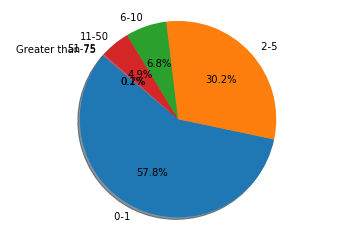

In [15]:
#Plot

plt.pie(pie_chart['plays'], labels=pie_chart['category'], autopct='%1.1f%%', shadow=True, startangle=140)
plt.axis('equal')
plt.show()

### create a new df with user, artist, and plays

In [16]:
df_artist = new_df.groupby(by=['user','artist_name','category'])[['plays']].count().reset_index()

df_artist.head()

user artist_name category  plays
0  00007a02388c208ea7176479f6ae06f8224355b3       Dredg      2-5      1
1  00007a02388c208ea7176479f6ae06f8224355b3     Local H      0-1      1
2  00007a02388c208ea7176479f6ae06f8224355b3         M83      2-5      1
3  00007a02388c208ea7176479f6ae06f8224355b3    No Doubt      0-1      1
4  00007a02388c208ea7176479f6ae06f8224355b3     Pantera      0-1      1

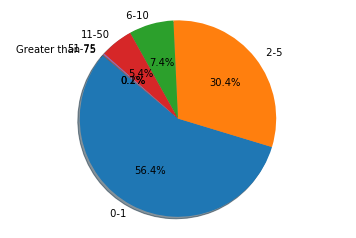

In [17]:
#Group by categories

art_pc = df_artist.groupby(by=['category'])[['plays']].count().reset_index()

art_pc.head()
plt.pie(art_pc['plays'], labels=art_pc['category'], autopct='%1.1f%%', shadow=True, startangle=140)
plt.axis('equal')
plt.show()

### Convert the df back to sframe

In [18]:
###Add the data back to SFrame (both song and artist)

combo_songs = gl.SFrame(new_df)
artist = gl.SFrame(df_artist)

In [19]:
###Confirm both Sframea are ok

combo_songs.head()


Columns:
	user	str
	song_id	str
	plays	int
	title	str
	release	str
	artist_name	str
	year	int
	category	str

Rows: 10

Data:
+-------------------------------+--------------------+-------+
|              user             |      song_id       | plays |
+-------------------------------+--------------------+-------+
| fd50c4007b68a3737fe052d5a4... | SOBONKR12A58A7A7E0 |   1   |
| fd50c4007b68a3737fe052d5a4... | SOEGIYH12A6D4FC0E3 |   1   |
| fd50c4007b68a3737fe052d5a4... | SOFLJQZ12A6D4FADA6 |   1   |
| fd50c4007b68a3737fe052d5a4... | SOHTKMO12AB01843B0 |   1   |
| fd50c4007b68a3737fe052d5a4... | SODQZCY12A6D4F9D11 |   1   |
| fd50c4007b68a3737fe052d5a4... | SOXLOQG12AF72A2D55 |   1   |
| d7083f5e1d50c264277d624340... | SOUVUHC12A67020E3B |   1   |
| d7083f5e1d50c264277d624340... | SOUQERE12A58A75633 |   1   |
| d7083f5e1d50c264277d624340... | SOIPJAX12A8C141A2D |   1   |
| d7083f5e1d50c264277d624340... | SOEFCDJ12AB0185FA0 |   2   |
+-------------------------------+--------------------+-------+
+-------------------------------+-------------------------------+
|             title             |            release            |
+-------------------------------+-------------------------------+
|         You're The One        |       If There Was A Way      |
| Horn Concerto No. 4 in E f... | Mozart - Eine kleine Nacht... |
|            Tive Sim           |        Nova Bis-Cartola       |
| Catch You Baby (Steve Pitr... |         Catch You Baby        |
|          El Cuatrero          |  From Argentina To The World  |
| Unite (2009 Digital Remaster) | Hello Nasty (Remastered Ed... |
|           Lift Me Up          |         Lift Me Up EP         |
|        Living In A Lie        | Planet Of The Apes - Best ... |
|         Open Your Eyes        |            Nice 90s           |
|           Kurtizana           |           Bud a nebe          |
+-------------------------------+-------------------------------+
+-------------------------------+------+----------+
|          artist_name          | year | category |
+-------------------------------+------+----------+
|         Dwight Yoakam         | 1990 |    0-1   |
| Barry Tuckwell/Academy of ... |  0   |    0-1   |
|            Cartola            | 1974 |    0-1   |
|         Lonnie Gordon         |  0   |    0-1   |
|          Miguel Calo          | 2001 |    0-1   |
|          Beastie Boys         |  0   |    0-1   |
|              Moby             | 2005 |    0-1   |
|           Guano Apes          | 2000 |    0-1   |
|           Guano Apes          | 1997 |    0-1   |
|              UDG              |  0   |    2-5   |
+-------------------------------+------+----------+
[10 rows x 8 columns]

In [20]:
artist.head()

Columns:
	user	str
	artist_name	str
	category	str
	plays	int

Rows: 10

Data:
+-------------------------------+---------------------+----------+-------+
|              user             |     artist_name     | category | plays |
+-------------------------------+---------------------+----------+-------+
| 00007a02388c208ea7176479f6... |        Dredg        |    2-5   |   1   |
| 00007a02388c208ea7176479f6... |       Local H       |    0-1   |   1   |
| 00007a02388c208ea7176479f6... |         M83         |    2-5   |   1   |
| 00007a02388c208ea7176479f6... |       No Doubt      |    0-1   |   1   |
| 00007a02388c208ea7176479f6... |       Pantera       |    0-1   |   1   |
| 00007a02388c208ea7176479f6... |      Sam Sparro     |    0-1   |   2   |
| 00007a02388c208ea7176479f6... | Stone Temple Pilots |    0-1   |   1   |
| 00007a02388c208ea7176479f6... | Stone Temple Pilots |    2-5   |   1   |
| 00014a76ed063e1a749171a253... | Angels and Airwaves |    2-5   |   1   |
| 00014a76ed063e1a749171a253... |      Moodymann      |    2-5   |   1   |
+-------------------------------+---------------------+----------+-------+
[10 rows x 4 columns]

In [21]:
combo_songs.show()

Canvas is accessible via web browser at the URL: http://localhost:5980/index.html
Opening Canvas in default web browser.


In [22]:
artist.show()

Canvas is accessible via web browser at the URL: http://localhost:5980/index.html
Opening Canvas in default web browser.


In [23]:
combo_songs['user'].num_missing()

0

In [24]:
combo_songs['song_id'].num_missing()

0

In [25]:
combo_songs['plays'].num_missing()

0

In [26]:
combo_songs['artist_name'].num_missing()

0

The song data includes over 110,000 users listening to over 166,433 unique songs.   The data includes 138,499 unqiue song titles.   The inference is 27,934 songs have the same title although they are different songs.   Songs were played between 1 times and 923 times.  Both the song data as well as the artist data contain 28,266 unique artists.   Neither dataset is missing values.    

Since the user identification is based on a user ID, the possiblities of a single person having multiple user IDs or a single user ID being used by multiple individuals cannot be eliminated.   Since the sharing of user IDs 

In [27]:
#recommendation model based on the song ID

model = gl.recommender.create(combo_songs, user_id = "user", item_id="song_id", target = "plays")
results = model.recommend(users=None, k=5)
model.save("song_model")

Recsys training: model = ranking_factorization_recommender

Preparing data set.

Data has 1491952 observations with 110000 users and 163206 items.

Data prepared in: 6.30239s

Training ranking_factorization_recommender for recommendations.

+--------------------------------+--------------------------------------------------+----------+

| Parameter                      | Description                                      | Value    |

+--------------------------------+--------------------------------------------------+----------+

| num_factors                    | Factor Dimension                                 | 32       |

| regularization                 | L2 Regularization on Factors                     | 1e-009   |

| solver                         | Solver used for training                         | adagrad  |

| linear_regularization          | L2 Regularization on Linear Coefficients         | 1e-009   |

| ranking_regularization         | Rank-based Regularization Weight                 | 0.25     |

| max_iterations                 | Maximum Number of Iterations                     | 25       |

+--------------------------------+--------------------------------------------------+----------+

Optimizing model using SGD; tuning step size.

Using 186494 / 1491952 points for tuning the step size.

+---------+-------------------+------------------------------------------+

| Attempt | Initial Step Size | Estimated Objective Value                |

+---------+-------------------+------------------------------------------+

| 0       | 7.14286           | Not Viable                               |

| 1       | 1.78571           | Not Viable                               |

| 2       | 0.446429          | Not Viable                               |

| 3       | 0.111607          | No Decrease (1020.1 >= 103.904)          |

| 4       | 0.0279018         | 61.2287                                  |

| 5       | 0.0139509         | 67.6584                                  |

| 6       | 0.00697545        | 76.0521                                  |

| 7       | 0.00348772        | 82.5333                                  |

+---------+-------------------+------------------------------------------+

| Final   | 0.0279018         | 61.2287                                  |

+---------+-------------------+------------------------------------------+

Starting Optimization.

+---------+--------------+-------------------+-----------------------+-------------+

| Iter.   | Elapsed Time | Approx. Objective | Approx. Training RMSE | Step Size   |

+---------+--------------+-------------------+-----------------------+-------------+

| Initial | 0us          | 96.4703           | 7.01492               |             |

+---------+--------------+-------------------+-----------------------+-------------+

| 1       | 6.42s        | 69.3619           | 6.59332               | 0.0279018   |

| 2       | 12.52s       | 59.2154           | 6.07555               | 0.0279018   |

| 3       | 18.98s       | 55.3201           | 5.81188               | 0.0279018   |

| 4       | 27.71s       | 53.1054           | 5.64928               | 0.0279018   |

| 5       | 33.99s       | 51.5846           | 5.53566               | 0.0279018   |

| 6       | 40.70s       | 50.4778           | 5.44654               | 0.0279018   |

| 7       | 46.53s       | 49.6066           | 5.37459               | 0.0279018   |

| 8       | 52.34s       | 48.833            | 5.31                  | 0.0279018   |

| 9       | 58.21s       | 48.2006           | 5.25265               | 0.0279018   |

| 10      | 1m 4s        | 47.6546           | 5.20101               | 0.0279018   |

| 11      | 1m 9s        | 47.1426           | 5.15183               | 0.0279018   |

| 12      | 1m 15s       | 46.7363           | 5.11063               | 0.0279018   |

| 13      | 1m 21s       | 46.3635           | 5.07248               | 0.0279018   |

| 14      | 1m 27s       | 46.0284           | 5.03605               | 0.0279018   |

| 15      | 1m 33s       | 45.7319           | 5.0023                | 0.0279018   |

| 16      | 1m 39s       | 45.4916           | 4.97425               | 0.0279018   |

| 17      | 1m 45s       | 45.2909           | 4.94643               | 0.0279018   |

| 18      | 1m 51s       | 45.1069           | 4.92021               | 0.0279018   |

| 19      | 1m 57s       | 44.9856           | 4.89814               | 0.0279018   |

| 20      | 2m 3s        | 44.795            | 4.87361               | 0.0279018   |

| 21      | 2m 9s        | 44.625            | 4.85112               | 0.0279018   |

| 22      | 2m 15s       | 44.4576           | 4.82985               | 0.0279018   |

| 23      | 2m 21s       | 44.3378           | 4.80862               | 0.0279018   |

| 24      | 2m 26s       | 44.1528           | 4.78631               | 0.0279018   |

| 25      | 2m 32s       | 43.9366           | 4.7643                | 0.0279018   |

+---------+--------------+-------------------+-----------------------+-------------+

Optimization Complete: Maximum number of passes through the data reached.

Computing final objective value and training RMSE.

Final objective value: 42.7735

Final training RMSE: 4.67164

recommendations finished on 1000/110000 queries. users per second: 97.0599

recommendations finished on 2000/110000 queries. users per second: 103.641

recommendations finished on 3000/110000 queries. users per second: 106.153

recommendations finished on 4000/110000 queries. users per second: 107.502

recommendations finished on 5000/110000 queries. users per second: 108.379

recommendations finished on 6000/110000 queries. users per second: 108.814

recommendations finished on 7000/110000 queries. users per second: 108.982

recommendations finished on 8000/110000 queries. users per second: 109.17

recommendations finished on 9000/110000 queries. users per second: 109.163

recommendations finished on 10000/110000 queries. users per second: 109.25

recommendations finished on 11000/110000 queries. users per second: 109.293

recommendations finished on 12000/110000 queries. users per second: 109.162

recommendations finished on 13000/110000 queries. users per second: 109.165

recommendations finished on 14000/110000 queries. users per second: 109.213

recommendations finished on 15000/110000 queries. users per second: 109.293

recommendations finished on 16000/110000 queries. users per second: 109.342

recommendations finished on 17000/110000 queries. users per second: 109.369

recommendations finished on 18000/110000 queries. users per second: 109.415

recommendations finished on 19000/110000 queries. users per second: 109.444

recommendations finished on 20000/110000 queries. users per second: 109.446

recommendations finished on 21000/110000 queries. users per second: 109.478

recommendations finished on 22000/110000 queries. users per second: 109.493

recommendations finished on 23000/110000 queries. users per second: 109.515

recommendations finished on 24000/110000 queries. users per second: 109.525

recommendations finished on 25000/110000 queries. users per second: 109.444

recommendations finished on 26000/110000 queries. users per second: 109.466

recommendations finished on 27000/110000 queries. users per second: 109.457

recommendations finished on 28000/110000 queries. users per second: 109.495

recommendations finished on 29000/110000 queries. users per second: 109.534

recommendations finished on 30000/110000 queries. users per second: 109.535

recommendations finished on 31000/110000 queries. users per second: 109.552

recommendations finished on 32000/110000 queries. users per second: 109.553

recommendations finished on 33000/110000 queries. users per second: 109.552

recommendations finished on 34000/110000 queries. users per second: 109.578

recommendations finished on 35000/110000 queries. users per second: 109.445

recommendations finished on 36000/110000 queries. users per second: 109.239

recommendations finished on 37000/110000 queries. users per second: 109.262

recommendations finished on 38000/110000 queries. users per second: 109.185

recommendations finished on 39000/110000 queries. users per second: 109.207

recommendations finished on 40000/110000 queries. users per second: 109.219

recommendations finished on 41000/110000 queries. users per second: 109.215

recommendations finished on 42000/110000 queries. users per second: 109.235

recommendations finished on 43000/110000 queries. users per second: 109.261

recommendations finished on 44000/110000 queries. users per second: 109.262

recommendations finished on 45000/110000 queries. users per second: 109.282

recommendations finished on 46000/110000 queries. users per second: 109.3

recommendations finished on 47000/110000 queries. users per second: 109.308

recommendations finished on 48000/110000 queries. users per second: 109.322

recommendations finished on 49000/110000 queries. users per second: 109.337

recommendations finished on 50000/110000 queries. users per second: 109.338

recommendations finished on 51000/110000 queries. users per second: 109.298

recommendations finished on 52000/110000 queries. users per second: 109.302

recommendations finished on 53000/110000 queries. users per second: 109.294

recommendations finished on 54000/110000 queries. users per second: 109.268

recommendations finished on 55000/110000 queries. users per second: 109.138

recommendations finished on 56000/110000 queries. users per second: 109.126

recommendations finished on 57000/110000 queries. users per second: 109.098

recommendations finished on 58000/110000 queries. users per second: 109.088

recommendations finished on 59000/110000 queries. users per second: 109.083

recommendations finished on 60000/110000 queries. users per second: 109.055

recommendations finished on 61000/110000 queries. users per second: 109.059

recommendations finished on 62000/110000 queries. users per second: 109.016

recommendations finished on 63000/110000 queries. users per second: 109.012

recommendations finished on 64000/110000 queries. users per second: 108.92

recommendations finished on 65000/110000 queries. users per second: 108.952

recommendations finished on 66000/110000 queries. users per second: 108.936

recommendations finished on 67000/110000 queries. users per second: 108.915

recommendations finished on 68000/110000 queries. users per second: 108.917

recommendations finished on 69000/110000 queries. users per second: 108.882

recommendations finished on 70000/110000 queries. users per second: 108.642

recommendations finished on 71000/110000 queries. users per second: 108.537

recommendations finished on 72000/110000 queries. users per second: 108.55

recommendations finished on 73000/110000 queries. users per second: 108.557

recommendations finished on 74000/110000 queries. users per second: 108.57

recommendations finished on 75000/110000 queries. users per second: 108.593

recommendations finished on 76000/110000 queries. users per second: 108.6

recommendations finished on 77000/110000 queries. users per second: 108.561

recommendations finished on 78000/110000 queries. users per second: 108.562

recommendations finished on 79000/110000 queries. users per second: 108.573

recommendations finished on 80000/110000 queries. users per second: 108.591

recommendations finished on 81000/110000 queries. users per second: 108.592

recommendations finished on 82000/110000 queries. users per second: 108.6

recommendations finished on 83000/110000 queries. users per second: 108.61

recommendations finished on 84000/110000 queries. users per second: 108.617

recommendations finished on 85000/110000 queries. users per second: 108.616

recommendations finished on 86000/110000 queries. users per second: 108.619

recommendations finished on 87000/110000 queries. users per second: 108.631

recommendations finished on 88000/110000 queries. users per second: 108.643

recommendations finished on 89000/110000 queries. users per second: 108.648

recommendations finished on 90000/110000 queries. users per second: 108.607

recommendations finished on 91000/110000 queries. users per second: 108.607

recommendations finished on 92000/110000 queries. users per second: 108.605

recommendations finished on 93000/110000 queries. users per second: 108.601

recommendations finished on 94000/110000 queries. users per second: 108.61

recommendations finished on 95000/110000 queries. users per second: 108.622

recommendations finished on 96000/110000 queries. users per second: 108.628

recommendations finished on 97000/110000 queries. users per second: 108.637

recommendations finished on 98000/110000 queries. users per second: 108.651

recommendations finished on 99000/110000 queries. users per second: 108.648

recommendations finished on 100000/110000 queries. users per second: 108.659

recommendations finished on 101000/110000 queries. users per second: 108.672

recommendations finished on 102000/110000 queries. users per second: 108.68

recommendations finished on 103000/110000 queries. users per second: 108.655

recommendations finished on 104000/110000 queries. users per second: 108.663

recommendations finished on 105000/110000 queries. users per second: 108.539

recommendations finished on 106000/110000 queries. users per second: 108.55

recommendations finished on 107000/110000 queries. users per second: 108.551

recommendations finished on 108000/110000 queries. users per second: 108.559

recommendations finished on 109000/110000 queries. users per second: 108.566

recommendations finished on 110000/110000 queries. users per second: 108.427

In [28]:
results # the recommendation output

Columns:
	user	str
	song_id	str
	score	float
	rank	int

Rows: 550000

Data:
+-------------------------------+--------------------+---------------+------+
|              user             |      song_id       |     score     | rank |
+-------------------------------+--------------------+---------------+------+
| fd50c4007b68a3737fe052d5a4... | SOULTKQ12AB018A183 | 5.58576217986 |  1   |
| fd50c4007b68a3737fe052d5a4... | SOEHWGF12A6D4F8B2B | 5.58172807231 |  2   |
| fd50c4007b68a3737fe052d5a4... | SOGOSHO12AB0184D38 | 5.51796900801 |  3   |
| fd50c4007b68a3737fe052d5a4... | SOSUZFA12A8C13C04A | 4.87728808022 |  4   |
| fd50c4007b68a3737fe052d5a4... | SONQBUB12A6D4F8ED0 | 4.84173588402 |  5   |
| d7083f5e1d50c264277d624340... | SOEHWGF12A6D4F8B2B | 5.70163959864 |  1   |
| d7083f5e1d50c264277d624340... | SOGOSHO12AB0184D38 | 5.42188122071 |  2   |
| d7083f5e1d50c264277d624340... | SOULTKQ12AB018A183 | 5.41944079048 |  3   |
| d7083f5e1d50c264277d624340... | SONQBUB12A6D4F8ED0 | 4.86255263112 |  4   |
| d7083f5e1d50c264277d624340... | SOSUZFA12A8C13C04A | 4.80086618679 |  5   |
+-------------------------------+--------------------+---------------+------+
[550000 rows x 4 columns]
Note: Only the head of the SFrame is printed.
You can use print_rows(num_rows=m, num_columns=n) to print more rows and columns.

Above shows the top 5 ratings for each user

In [29]:
results

Columns:
	user	str
	song_id	str
	score	float
	rank	int

Rows: 550000

Data:
+-------------------------------+--------------------+---------------+------+
|              user             |      song_id       |     score     | rank |
+-------------------------------+--------------------+---------------+------+
| fd50c4007b68a3737fe052d5a4... | SOULTKQ12AB018A183 | 5.58576217986 |  1   |
| fd50c4007b68a3737fe052d5a4... | SOEHWGF12A6D4F8B2B | 5.58172807231 |  2   |
| fd50c4007b68a3737fe052d5a4... | SOGOSHO12AB0184D38 | 5.51796900801 |  3   |
| fd50c4007b68a3737fe052d5a4... | SOSUZFA12A8C13C04A | 4.87728808022 |  4   |
| fd50c4007b68a3737fe052d5a4... | SONQBUB12A6D4F8ED0 | 4.84173588402 |  5   |
| d7083f5e1d50c264277d624340... | SOEHWGF12A6D4F8B2B | 5.70163959864 |  1   |
| d7083f5e1d50c264277d624340... | SOGOSHO12AB0184D38 | 5.42188122071 |  2   |
| d7083f5e1d50c264277d624340... | SOULTKQ12AB018A183 | 5.41944079048 |  3   |
| d7083f5e1d50c264277d624340... | SONQBUB12A6D4F8ED0 | 4.86255263112 |  4   |
| d7083f5e1d50c264277d624340... | SOSUZFA12A8C13C04A | 4.80086618679 |  5   |
+-------------------------------+--------------------+---------------+------+
[550000 rows x 4 columns]
Note: Only the head of the SFrame is printed.
You can use print_rows(num_rows=m, num_columns=n) to print more rows and columns.

https://turi.com/products/create/docs/generated/graphlab.recommender.item_similarity_recommender.ItemSimilarityRecommender.html
jaccard = when only if rated is needed not what the rating is
cosine = does not consider the differences in the mean and var of the ratings
pearson = effects of means and variance have been removed

In [30]:
song_rec = gl.recommender.item_similarity_recommender.create(combo_songs,
                                                             user_id="user",
                                                             item_id="song_id",
                                                             target="plays",
                                                             only_top_k=3,
                                                             similarity_type="cosine")

song_results = song_rec.get_similar_items(k=3)
song_results.head

Recsys training: model = item_similarity

Warning: Ignoring columns title, release, artist_name, year, category;

To use these columns in scoring predictions, use a model that allows the use of additional features.

Preparing data set.

Data has 1491952 observations with 110000 users and 163206 items.

Data prepared in: 2.53431s

Training model from provided data.

Gathering per-item and per-user statistics.

+--------------------------------+------------+

| Elapsed Time (Item Statistics) | % Complete |

+--------------------------------+------------+

| 1.5ms                          | 1.75       |

| 139.596ms                      | 100        |

+--------------------------------+------------+

Setting up lookup tables.

Processing the 32 most common items by brute force search.

Transposing user-item lists for use in nearest neighbor search.

+------------------------------------+------------+

| Elapsed Time (Data Transposition)) | % Complete |

+------------------------------------+------------+

| 20.014ms                           | 0          |

| 296.829ms                          | 100        |

+------------------------------------+------------+

+-------------------------------------+------------------+-----------------+

| Elapsed Time (Constructing Lookups) | Total % Complete | Items Processed |

+-------------------------------------+------------------+-----------------+

| 494.715ms                           | 0                | 0               |

+-------------------------------------+------------------+-----------------+

Processing data in one pass using sparse lookup tables.

+-------------------------------------+------------------+-----------------+

| Elapsed Time (Constructing Lookups) | Total % Complete | Items Processed |

+-------------------------------------+------------------+-----------------+

| 3.20s                               | 0                | 32              |

| 4.20s                               | 65               | 106357          |

| 6.06s                               | 100              | 163206          |

+-------------------------------------+------------------+-----------------+

Finalizing lookup tables.

Generating candidate set for working with new users.

Finished training in 6.37614s

<bound method SFrame.head of Columns:
	song_id	str
	similar	str
	score	float
	rank	int

Rows: 481922

Data:
+--------------------+--------------------+-------+------+
|      song_id       |      similar       | score | rank |
+--------------------+--------------------+-------+------+
| SOBONKR12A58A7A7E0 | SOBZZER12A6D4F7FA6 |  1.0  |  1   |
| SOBONKR12A58A7A7E0 | SOBWPDC12A6D4FACBC |  1.0  |  2   |
| SOBONKR12A58A7A7E0 | SOUNOAW12AB018A2A3 |  1.0  |  3   |
| SOEGIYH12A6D4FC0E3 | SOSJBQM12A8C1423D2 |  1.0  |  1   |
| SOEGIYH12A6D4FC0E3 | SOJTDUS12A6D4FBF0E |  1.0  |  2   |
| SOEGIYH12A6D4FC0E3 | SOSNZQS12AB017C794 |  1.0  |  3   |
| SOFLJQZ12A6D4FADA6 | SOYSLIC12A6701EA8A |  1.0  |  1   |
| SOFLJQZ12A6D4FADA6 | SOQIONQ12A6701D958 |  1.0  |  2   |
| SOFLJQZ12A6D4FADA6 | SOUJDUO12AB018320E |  1.0  |  3   |
| SOHTKMO12AB01843B0 | SOWYSXB12A6D4F9A1F |  1.0  |  1   |
+--------------------+--------------------+-------+------+
[481922 rows x 4 columns]
Note: Only the head of the SFrame is pri

In [31]:
artist_rec = gl.recommender.item_similarity_recommender.create(artist,
                                                             user_id="user",
                                                             item_id="artist_name",
                                                             target="plays",
                                                             only_top_k=3,
                                                             similarity_type="cosine")

artist_results = artist_rec.get_similar_items(k=3)
artist_results.head

Recsys training: model = item_similarity

Warning: Ignoring columns category;

To use these columns in scoring predictions, use a model that allows the use of additional features.

Preparing data set.

Data has 1202592 observations with 110000 users and 28366 items.

Data prepared in: 2.06718s

Training model from provided data.

Gathering per-item and per-user statistics.

+--------------------------------+------------+

| Elapsed Time (Item Statistics) | % Complete |

+--------------------------------+------------+

| 0us                            | 2.5        |

| 93.482ms                       | 100        |

+--------------------------------+------------+

Setting up lookup tables.

Processing data in one pass using dense lookup tables.

+-------------------------------------+------------------+-----------------+

| Elapsed Time (Constructing Lookups) | Total % Complete | Items Processed |

+-------------------------------------+------------------+-----------------+

| 5.27s                               | 0                | 0               |

| 6.27s                               | 21.25            | 6083            |

| 7.27s                               | 57.5             | 16379           |

| 20.07s                              | 100              | 28366           |

+-------------------------------------+------------------+-----------------+

Finalizing lookup tables.

Generating candidate set for working with new users.

Finished training in 20.3753s

<bound method SFrame.head of Columns:
	artist_name	str
	similar	str
	score	float
	rank	int

Rows: 84942

Data:
+-------------+-------------------------+----------------+------+
| artist_name |         similar         |     score      | rank |
+-------------+-------------------------+----------------+------+
|    Dredg    |     Jeff Scott Soto     | 0.533465087414 |  1   |
|    Dredg    |          Ulver          | 0.378447473049 |  2   |
|    Dredg    |           Absu          | 0.278019189835 |  3   |
|   Local H   |         Failure         | 0.156700193882 |  1   |
|   Local H   |         91 Suite        | 0.105409264565 |  2   |
|   Local H   | Bill Haley & The Comets | 0.105409264565 |  3   |
|     M83     |        Air France       |  0.3870844841  |  1   |
|     M83     |     Ulrich Schnauss     | 0.340979933739 |  2   |
|     M83     |   The Mercury Program   | 0.330810129642 |  3   |
|   No Doubt  |   No Doubt / Buccaneer  | 0.136286199093 |  1   |
+-------------+----------------

In [32]:
#Break the data - train test - by user:  80% to train.  20% to test.   limit to 100 user for the real time for this example
#song data
train_song, test_song = gl.recommender.util.random_split_by_user(combo_songs,
                                                      user_id="user", item_id="song_id",
                                                      item_test_proportion=0.2)

In [35]:
from IPython.display import display
from IPython.display import Image

gl.canvas.set_target('ipynb')

song_rec = gl.recommender.item_similarity_recommender.create(train_song,
                                                             user_id="user",
                                                             item_id="song_id",
                                                             target="plays",
                                                             only_top_k=5,
                                                             similarity_type="cosine")

rmse_results = song_rec.evaluate(test_song)


Recsys training: model = item_similarity

Warning: Ignoring columns title, release, artist_name, year, category;

To use these columns in scoring predictions, use a model that allows the use of additional features.

Preparing data set.

Data has 1489352 observations with 110000 users and 163095 items.

Data prepared in: 2.41919s

Training model from provided data.

Gathering per-item and per-user statistics.

+--------------------------------+------------+

| Elapsed Time (Item Statistics) | % Complete |

+--------------------------------+------------+

| 1ms                            | 0.75       |

| 102.827ms                      | 100        |

+--------------------------------+------------+

Setting up lookup tables.

Processing the 32 most common items by brute force search.

Transposing user-item lists for use in nearest neighbor search.

+------------------------------------+------------+

| Elapsed Time (Data Transposition)) | % Complete |

+------------------------------------+------------+

| 17.019ms                           | 0          |

| 371.382ms                          | 100        |

+------------------------------------+------------+

+-------------------------------------+------------------+-----------------+

| Elapsed Time (Constructing Lookups) | Total % Complete | Items Processed |

+-------------------------------------+------------------+-----------------+

| 547.306ms                           | 0                | 0               |

+-------------------------------------+------------------+-----------------+

Processing data in one pass using sparse lookup tables.

+-------------------------------------+------------------+-----------------+

| Elapsed Time (Constructing Lookups) | Total % Complete | Items Processed |

+-------------------------------------+------------------+-----------------+

| 3.30s                               | 0                | 32              |

| 4.30s                               | 63               | 102835          |

| 5.80s                               | 100              | 163095          |

+-------------------------------------+------------------+-----------------+

Finalizing lookup tables.

Generating candidate set for working with new users.

Finished training in 6.11848s


Precision and recall summary statistics by cutoff
+--------+------------------+------------------+
| cutoff |  mean_precision  |   mean_recall    |
+--------+------------------+------------------+
|   1    | 0.00463499420626 | 0.00225955967555 |
|   2    | 0.00521436848204 | 0.00472190034762 |
|   3    | 0.00540749324063 | 0.00701180819953 |
|   4    | 0.00463499420626 | 0.0074808254704  |
|   5    | 0.00393974507532 | 0.00786707498758 |
|   6    | 0.00347624565469 | 0.00815676212548 |
|   7    | 0.00430392319152 | 0.0116054185289  |
|   8    | 0.00420046349942 | 0.0124551674668  |
|   9    | 0.00424874468907 |  0.015517574353  |
|   10   | 0.00428736964079 | 0.0161079135876  |
+--------+------------------+------------------+
[10 rows x 3 columns]

('\nOverall RMSE: ', 6.278727125514358)

Per User RMSE (best)
+-------------------------------+-------+----------------+
|              user             | count |      rmse      |
+-------------------------------+-------+----------------+
|

In [36]:
#print rmse_results ('rmse_by_item')
print rmse_results.viewkeys()


dict_keys(['rmse_by_user', 'precision_recall_overall', 'rmse_by_item', 'precision_recall_by_user', 'rmse_overall'])


In [37]:
rmse_results['rmse_overall']

6.278727125514358

In [38]:
rmse_results['rmse_by_user']

Columns:
	user	str
	count	int
	rmse	float

Rows: 863

Data:
+-------------------------------+-------+---------------+
|              user             | count |      rmse     |
+-------------------------------+-------+---------------+
| afa789497ac76be6b065f0798f... |   3   |      1.0      |
| bef3adf0c1b916ac9b549f7798... |   3   |      5.0      |
| 9156df28bd49301f03306f6016... |   2   |      1.0      |
| d9a7bbc39cb6cae61b959de6da... |   3   |      1.0      |
| c174d59c27220c94999bf67cd9... |   4   |      1.0      |
| 1be569aefb976bae9aa6a29af4... |   9   | 4.20317340431 |
| ee2e4d4bceccab6ed27930d2b6... |   1   | 1.45343492031 |
| ad735bb68f23dd440dc86a6670... |   1   |      1.0      |
| e7a396b784c0140d0d86930b49... |   2   | 10.4920118747 |
| bec7714c456d4fc41bd194ba49... |   4   | 6.61437827766 |
+-------------------------------+-------+---------------+
[863 rows x 3 columns]
Note: Only the head of the SFrame is printed.
You can use print_rows(num_rows=m, num_columns=n) to print more rows and columns.

In [39]:
rmse_results['rmse_by_item']

Columns:
	song_id	str
	count	int
	rmse	float

Rows: 2266

Data:
+--------------------+-------+---------------+
|      song_id       | count |      rmse     |
+--------------------+-------+---------------+
| SOZEJTU12A8C1422B8 |   1   |      1.0      |
| SOEKEWC12A8C132A59 |   1   |      1.0      |
| SOQIPYO12AAF3B5B1D |   1   |      10.0     |
| SOYIOZB12A58A797FC |   1   |      4.0      |
| SOPCFDZ12A58A7A13C |   1   |      1.0      |
| SOANOGG12A6D4FA13F |   1   |      2.0      |
| SOLACVK12A8C13ABAA |   1   |      1.0      |
| SOOCALE12A6701EB05 |   1   |      1.0      |
| SOZVCRW12A67ADA0B7 |   3   | 5.35412613474 |
| SOSZAST12A6D4F6245 |   1   |      2.0      |
+--------------------+-------+---------------+
[2266 rows x 3 columns]
Note: Only the head of the SFrame is printed.
You can use print_rows(num_rows=m, num_columns=n) to print more rows and columns.

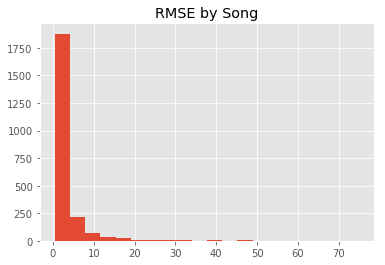

In [40]:
#look at distribution of values from the rmse

from matplotlib import pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

rmsevals = rmse_results['rmse_by_item']['rmse']

plt.hist(rmsevals, bins=20)
plt.title('RMSE by Song')
plt.show()

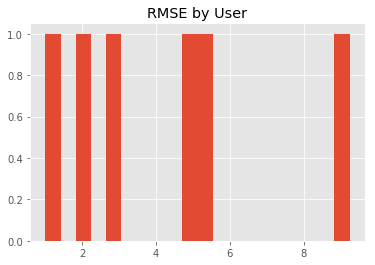

In [41]:
#look at distribution of values from the rmse

from matplotlib import pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

rmsevals = rmse_results['rmse_by_user']['rmse']
rmsevals = rmsevals[rmse_results['rmse_by_user']['count']>10]


plt.hist(rmsevals, bins=20)
plt.title('RMSE by User')
plt.show()

In [42]:
rmse_results['rmse_by_user']

Columns:
	user	str
	count	int
	rmse	float

Rows: 863

Data:
+-------------------------------+-------+---------------+
|              user             | count |      rmse     |
+-------------------------------+-------+---------------+
| afa789497ac76be6b065f0798f... |   3   |      1.0      |
| bef3adf0c1b916ac9b549f7798... |   3   |      5.0      |
| 9156df28bd49301f03306f6016... |   2   |      1.0      |
| d9a7bbc39cb6cae61b959de6da... |   3   |      1.0      |
| c174d59c27220c94999bf67cd9... |   4   |      1.0      |
| 1be569aefb976bae9aa6a29af4... |   9   | 4.20317340431 |
| ee2e4d4bceccab6ed27930d2b6... |   1   | 1.45343492031 |
| ad735bb68f23dd440dc86a6670... |   1   |      1.0      |
| e7a396b784c0140d0d86930b49... |   2   | 10.4920118747 |
| bec7714c456d4fc41bd194ba49... |   4   | 6.61437827766 |
+-------------------------------+-------+---------------+
[863 rows x 3 columns]
Note: Only the head of the SFrame is printed.
You can use print_rows(num_rows=m, num_columns=n) to print more rows and columns.

In [43]:
#looking at recall and precision
rmse_results['precision_recall_by_user']

Columns:
	user	str
	cutoff	int
	precision	float
	recall	float
	count	int

Rows: 15534

Data:
+-------------------------------+--------+-----------+--------+-------+
|              user             | cutoff | precision | recall | count |
+-------------------------------+--------+-----------+--------+-------+
| 00014a76ed063e1a749171a253... |   1    |    0.0    |  0.0   |   3   |
| 00014a76ed063e1a749171a253... |   2    |    0.0    |  0.0   |   3   |
| 00014a76ed063e1a749171a253... |   3    |    0.0    |  0.0   |   3   |
| 00014a76ed063e1a749171a253... |   4    |    0.0    |  0.0   |   3   |
| 00014a76ed063e1a749171a253... |   5    |    0.0    |  0.0   |   3   |
| 00014a76ed063e1a749171a253... |   6    |    0.0    |  0.0   |   3   |
| 00014a76ed063e1a749171a253... |   7    |    0.0    |  0.0   |   3   |
| 00014a76ed063e1a749171a253... |   8    |    0.0    |  0.0   |   3   |
| 00014a76ed063e1a749171a253... |   9    |    0.0    |  0.0   |   3   |
| 00014a76ed063e1a749171a253... |   10   |    0.0    |  0.0   |   3   |
+-------------------------------+--------+-----------+--------+-------+
[15534 rows x 5 columns]
Note: Only the head of the SFrame is printed.
You can use print_rows(num_rows=m, num_columns=n) to print more rows and columns.

In [44]:
#do the aggregate

import graphlab.aggregate as agg

# we will be using these aggregations
agg_list = [ agg.AVG('precision'),agg.STD('precision'),agg.AVG('recall'),agg.STD('recall')]

# apply these functions to each group(group the restuls by 'k' which is the cutoff)
# the cutoff is the number of top items to look for 
# https://dato.com/products/create/docs/generated/graphlab.recommender.util.precision_recall_by_user.html#

rmse_results['precision_recall_by_user'].groupby('cutoff',agg_list)

Columns:
	cutoff	int
	Avg of precision	float
	Stdv of precision	float
	Avg of recall	float
	Stdv of recall	float

Rows: 18

Data:
+--------+------------------+-------------------+------------------+
| cutoff | Avg of precision | Stdv of precision |  Avg of recall   |
+--------+------------------+-------------------+------------------+
|   36   | 0.00321874597657 |  0.0103759510478  | 0.0406847369188  |
|   2    | 0.00521436848204 |  0.0507936472637  | 0.00472190034762 |
|   46   | 0.00269534989168 |  0.00842874310661 | 0.0430022340219  |
|   31   | 0.00336410869809 |   0.01133810059   | 0.0374843837764  |
|   26   | 0.00343167840271 |  0.0122908691957  | 0.0324512554524  |
|   8    | 0.00420046349942 |  0.0240797804868  | 0.0124551674668  |
|   5    | 0.00393974507532 |  0.0277925785742  | 0.00786707498758 |
|   16   | 0.00391077636153 |   0.016289267727  | 0.0233018108453  |
|   41   | 0.00288274029901 |  0.00916835963669 | 0.0412641111946  |
|   4    | 0.00463499420626 |  0.0337233654945  | 0.0074808254704  |
+--------+------------------+-------------------+------------------+
+-----------------+
|  Stdv of recall |
+-----------------+
|  0.148553295678 |
| 0.0563239692094 |
|  0.152822643915 |
|  0.145173759229 |
|  0.135726145706 |
| 0.0819576156219 |
| 0.0664655235774 |
|  0.114790898892 |
|  0.148934683338 |
| 0.0655350601167 |
+-----------------+
[18 rows x 5 columns]
Note: Only the head of the SFrame is printed.
You can use print_rows(num_rows=m, num_columns=n) to print more rows and columns.

## Cross Validated Collaborative Filtering

In [46]:
recl = gl.recommender.ranking_factorization_recommender.create(train_song,
                                                             user_id="user",
                                                             item_id="song_id",
                                                             target="plays")

rmse_results = recl.evaluate(test_song)

Recsys training: model = ranking_factorization_recommender

Preparing data set.

Data has 1489352 observations with 110000 users and 163095 items.

Data prepared in: 5.93078s

Training ranking_factorization_recommender for recommendations.

+--------------------------------+--------------------------------------------------+----------+

| Parameter                      | Description                                      | Value    |

+--------------------------------+--------------------------------------------------+----------+

| num_factors                    | Factor Dimension                                 | 32       |

| regularization                 | L2 Regularization on Factors                     | 1e-009   |

| solver                         | Solver used for training                         | adagrad  |

| linear_regularization          | L2 Regularization on Linear Coefficients         | 1e-009   |

| ranking_regularization         | Rank-based Regularization Weight                 | 0.25     |

| max_iterations                 | Maximum Number of Iterations                     | 25       |

+--------------------------------+--------------------------------------------------+----------+

Optimizing model using SGD; tuning step size.

Using 186169 / 1489352 points for tuning the step size.

+---------+-------------------+------------------------------------------+

| Attempt | Initial Step Size | Estimated Objective Value                |

+---------+-------------------+------------------------------------------+

| 0       | 7.14286           | Not Viable                               |

| 1       | 1.78571           | Not Viable                               |

| 2       | 0.446429          | Not Viable                               |

| 3       | 0.111607          | No Decrease (1116.58 >= 96.407)          |

| 4       | 0.0279018         | 51.635                                   |

| 5       | 0.0139509         | 59.0151                                  |

| 6       | 0.00697545        | 69.1665                                  |

| 7       | 0.00348772        | 73.9227                                  |

+---------+-------------------+------------------------------------------+

| Final   | 0.0279018         | 51.635                                   |

+---------+-------------------+------------------------------------------+

Starting Optimization.

+---------+--------------+-------------------+-----------------------+-------------+

| Iter.   | Elapsed Time | Approx. Objective | Approx. Training RMSE | Step Size   |

+---------+--------------+-------------------+-----------------------+-------------+

| Initial | 0us          | 96.5459           | 7.01756               |             |

+---------+--------------+-------------------+-----------------------+-------------+

| 1       | 7.17s        | 68.3012           | 6.50761               | 0.0279018   |

| 2       | 14.19s       | 59.0986           | 6.08404               | 0.0279018   |

| 3       | 20.53s       | 55.48             | 5.8557                | 0.0279018   |

| 4       | 26.84s       | 53.3152           | 5.69673               | 0.0279018   |

| 5       | 33.76s       | 51.8121           | 5.58373               | 0.0279018   |

| 6       | 40.70s       | 50.6693           | 5.49058               | 0.0279018   |

| 7       | 46.92s       | 49.7222           | 5.41527               | 0.0279018   |

| 8       | 54.38s       | 48.9616           | 5.35202               | 0.0279018   |

| 9       | 1m 0s        | 48.2466           | 5.29248               | 0.0279018   |

| 10      | 1m 7s        | 47.621            | 5.23856               | 0.0279018   |

| 11      | 1m 13s       | 47.0396           | 5.18689               | 0.0279018   |

| 12      | 1m 20s       | 46.4555           | 5.13516               | 0.0279018   |

| 13      | 1m 27s       | 45.8838           | 5.08517               | 0.0279018   |

| 14      | 1m 35s       | 45.3858           | 5.03671               | 0.0279018   |

| 15      | 1m 44s       | 44.8885           | 4.98742               | 0.0279018   |

| 16      | 1m 50s       | 44.3503           | 4.94133               | 0.0279018   |

| 17      | 1m 57s       | 43.8928           | 4.89337               | 0.0279018   |

| 18      | 2m 4s        | 43.4739           | 4.84902               | 0.0279018   |

| 19      | 2m 12s       | 43.0692           | 4.80572               | 0.0279018   |

| 20      | 2m 18s       | 42.656            | 4.76195               | 0.0279018   |

| 21      | 2m 24s       | 42.2509           | 4.72204               | 0.0279018   |

| 22      | 2m 30s       | 41.8678           | 4.68046               | 0.0279018   |

| 23      | 2m 36s       | 41.5343           | 4.6416                | 0.0279018   |

| 24      | 2m 42s       | 41.2067           | 4.60524               | 0.0279018   |

| 25      | 2m 50s       | 40.8578           | 4.56697               | 0.0279018   |

+---------+--------------+-------------------+-----------------------+-------------+

Optimization Complete: Maximum number of passes through the data reached.

Computing final objective value and training RMSE.

Final objective value: 39.5773

Final training RMSE: 4.45409


Precision and recall summary statistics by cutoff
+--------+----------------+-------------+
| cutoff | mean_precision | mean_recall |
+--------+----------------+-------------+
|   1    |      0.0       |     0.0     |
|   2    |      0.0       |     0.0     |
|   3    |      0.0       |     0.0     |
|   4    |      0.0       |     0.0     |
|   5    |      0.0       |     0.0     |
|   6    |      0.0       |     0.0     |
|   7    |      0.0       |     0.0     |
|   8    |      0.0       |     0.0     |
|   9    |      0.0       |     0.0     |
|   10   |      0.0       |     0.0     |
+--------+----------------+-------------+
[10 rows x 3 columns]

('\nOverall RMSE: ', 3.8459220744643567)

Per User RMSE (best)
+-------------------------------+-------+-------------------+
|              user             | count |        rmse       |
+-------------------------------+-------+-------------------+
| f372f975c1dfdd760c5572b19c... |   1   | 0.000994912070646 |
+--------------------------

In [47]:
rmse_results['precision_recall_by_user'].groupby('cutoff',[agg.AVG('precision'),agg.STD('precision'),agg.AVG('recall')])
# actually made it worse

Columns:
	cutoff	int
	Avg of precision	float
	Stdv of precision	float
	Avg of recall	float

Rows: 18

Data:
+--------+-------------------+-------------------+-------------------+
| cutoff |  Avg of precision | Stdv of precision |   Avg of recall   |
+--------+-------------------+-------------------+-------------------+
|   36   |  0.00119093601133 |  0.00593629612685 |  0.0160836138241  |
|   2    |        0.0        |        0.0        |        0.0        |
|   46   |  0.00120912892337 |  0.00540410219376 |  0.0199493277419  |
|   31   | 0.000934474638358 |  0.00562873411852 |  0.0107037098346  |
|   26   | 0.000757643283715 |  0.00534472664889 |  0.00622965292722 |
|   8    |        0.0        |        0.0        |        0.0        |
|   5    |        0.0        |        0.0        |        0.0        |
|   16   | 0.000217265353418 |  0.00367857042271 | 0.000907686365392 |
|   41   |  0.00124353503095 |  0.0058564759965  |   0.018018080156  |
|   4    |        0.0        |        0.0        |        0.0        |
+--------+-------------------+-------------------+-------------------+
[18 rows x 4 columns]
Note: Only the head of the SFrame is printed.
You can use print_rows(num_rows=m, num_columns=n) to print more rows and columns.

In [48]:
recl = gl.recommender.ranking_factorization_recommender.create(train_song,
                                                             user_id="user",
                                                             item_id="song_id",
                                                             target="plays",
                                                              num_factors=16,  #override default
                                                              regularization=1e-02,
                                                              linear_regularization = 1e-3)

rmse_results = recl.evaluate(test_song)

Recsys training: model = ranking_factorization_recommender

Preparing data set.

Data has 1489352 observations with 110000 users and 163095 items.

Data prepared in: 6.4609s

Training ranking_factorization_recommender for recommendations.

+--------------------------------+--------------------------------------------------+----------+

| Parameter                      | Description                                      | Value    |

+--------------------------------+--------------------------------------------------+----------+

| num_factors                    | Factor Dimension                                 | 16       |

| regularization                 | L2 Regularization on Factors                     | 0.01     |

| solver                         | Solver used for training                         | adagrad  |

| linear_regularization          | L2 Regularization on Linear Coefficients         | 0.001    |

| ranking_regularization         | Rank-based Regularization Weight                 | 0.25     |

| max_iterations                 | Maximum Number of Iterations                     | 25       |

+--------------------------------+--------------------------------------------------+----------+

Optimizing model using SGD; tuning step size.

Using 186169 / 1489352 points for tuning the step size.

+---------+-------------------+------------------------------------------+

| Attempt | Initial Step Size | Estimated Objective Value                |

+---------+-------------------+------------------------------------------+

| 0       | 0.00494718        | 80.038                                   |

| 1       | 0.00247359        | 82.103                                   |

| 2       | 0.00123679        | 86.0699                                  |

| 3       | 0.000618397       | 90.6032                                  |

+---------+-------------------+------------------------------------------+

| Final   | 0.00494718        | 80.038                                   |

+---------+-------------------+------------------------------------------+

Starting Optimization.

+---------+--------------+-------------------+-----------------------+-------------+

| Iter.   | Elapsed Time | Approx. Objective | Approx. Training RMSE | Step Size   |

+---------+--------------+-------------------+-----------------------+-------------+

| Initial | 0us          | 96.546            | 7.01756               |             |

+---------+--------------+-------------------+-----------------------+-------------+

| 1       | 5.60s        | 87.335            | 6.83043               | 0.00494718  |

| 2       | 10.99s       | 81.7182           | 6.82523               | 0.00494718  |

| 3       | 18.53s       | 77.7666           | 6.89104               | 0.00494718  |

| 4       | 26.19s       | 76.8717           | 6.89458               | 0.00494718  |

| 5       | 33.71s       | 76.3158           | 6.88117               | 0.00494718  |

| 6       | 42.15s       | 75.9417           | 6.83896               | 0.00494718  |

| 7       | 49.22s       | 75.6348           | 6.80432               | 0.00494718  |

| 8       | 56.17s       | 75.3254           | 6.7885                | 0.00494718  |

| 9       | 1m 3s        | 75.0516           | 6.7781                | 0.00494718  |

| 10      | 1m 11s       | 74.8163           | 6.76778               | 0.00494718  |

| 11      | 1m 20s       | 74.6098           | 6.75789               | 0.00494718  |

| 12      | 1m 27s       | 74.4263           | 6.74125               | 0.00494718  |

| 13      | 1m 34s       | 74.2696           | 6.715                 | 0.00494718  |

| 14      | 1m 41s       | 74.146            | 6.68215               | 0.00494718  |

| 15      | 1m 47s       | 74.0412           | 6.65315               | 0.00494718  |

| 16      | 1m 54s       | 73.9414           | 6.63015               | 0.00494718  |

| 17      | 2m 0s        | 73.8426           | 6.61298               | 0.00494718  |

| 18      | 2m 6s        | 73.7406           | 6.60038               | 0.00494718  |

| 19      | 2m 12s       | 73.6355           | 6.59081               | 0.00494718  |

| 20      | 2m 18s       | 73.5321           | 6.5822                | 0.00494718  |

| 21      | 2m 25s       | 73.4305           | 6.57241               | 0.00494718  |

| 22      | 2m 31s       | 73.3338           | 6.56234               | 0.00494718  |

| 23      | 2m 38s       | 73.2422           | 6.55277               | 0.00494718  |

| 24      | 2m 44s       | 73.1524           | 6.54405               | 0.00494718  |

| 25      | 2m 50s       | 73.0663           | 6.53628               | 0.00494718  |

+---------+--------------+-------------------+-----------------------+-------------+

Optimization Complete: Maximum number of passes through the data reached.

Computing final objective value and training RMSE.

Final objective value: 73.1848

Final training RMSE: 6.52208


Precision and recall summary statistics by cutoff
+--------+------------------+------------------+
| cutoff |  mean_precision  |   mean_recall    |
+--------+------------------+------------------+
|   1    |       0.0        |       0.0        |
|   2    | 0.00521436848204 | 0.00438393202008 |
|   3    | 0.00617999227501 | 0.00660486674392 |
|   4    | 0.00666280417149 | 0.0112913608858  |
|   5    | 0.00556199304751 | 0.0118707351616  |
|   6    | 0.00521436848204 | 0.0129715462856  |
|   7    | 0.00513160072836 | 0.0145253227524  |
|   8    | 0.00463499420626 | 0.0147570724628  |
|   9    | 0.00463499420626 | 0.0164372578625  |
|   10   | 0.00475086906141 | 0.0179951309152  |
+--------+------------------+------------------+
[10 rows x 3 columns]

('\nOverall RMSE: ', 4.828636527892884)

Per User RMSE (best)
+-------------------------------+-------+----------------+
|              user             | count |      rmse      |
+-------------------------------+-------+----------------+
|

In [49]:
rmse_results['precision_recall_by_user'].groupby('cutoff',[agg.AVG('precision'),agg.STD('precision'),agg.AVG('recall')])

Columns:
	cutoff	int
	Avg of precision	float
	Stdv of precision	float
	Avg of recall	float

Rows: 18

Data:
+--------+------------------+-------------------+------------------+
| cutoff | Avg of precision | Stdv of precision |  Avg of recall   |
+--------+------------------+-------------------+------------------+
|   36   | 0.00354062057422 |  0.0115025029839  | 0.0518315082626  |
|   2    | 0.00521436848204 |  0.0507936472637  | 0.00438393202008 |
|   46   | 0.00314877323795 |  0.00967388414213 | 0.0580515049519  |
|   31   | 0.00377527753897 |  0.0127669893616  | 0.0450611060113  |
|   26   | 0.00387735092254 |  0.0137458005915  | 0.0396729252465  |
|   8    | 0.00463499420626 |  0.0243742076123  | 0.0147570724628  |
|   5    | 0.00556199304751 |   0.032885602364  | 0.0118707351616  |
|   16   | 0.00427288528389 |  0.0181733950908  | 0.0256235588796  |
|   41   | 0.00322188621654 |  0.0104010891809  | 0.0526633241871  |
|   4    | 0.00666280417149 |  0.0402654701133  | 0.0112913608858  |
+--------+------------------+-------------------+------------------+
[18 rows x 4 columns]
Note: Only the head of the SFrame is printed.
You can use print_rows(num_rows=m, num_columns=n) to print more rows and columns.

## Is this better than the item item matrix

In [51]:
comparison = gl.recommender.util.compare_models(test_song, [song_rec, recl])

PROGRESS: Evaluate model M0

Precision and recall summary statistics by cutoff
+--------+------------------+------------------+
| cutoff |  mean_precision  |   mean_recall    |
+--------+------------------+------------------+
|   1    | 0.00463499420626 | 0.00225955967555 |
|   2    | 0.00521436848204 | 0.00472190034762 |
|   3    | 0.00540749324063 | 0.00701180819953 |
|   4    | 0.00463499420626 | 0.0074808254704  |
|   5    | 0.00393974507532 | 0.00786707498758 |
|   6    | 0.00347624565469 | 0.00815676212548 |
|   7    | 0.00430392319152 | 0.0116054185289  |
|   8    | 0.00420046349942 | 0.0124551674668  |
|   9    | 0.00424874468907 |  0.015517574353  |
|   10   | 0.00428736964079 | 0.0161079135876  |
+--------+------------------+------------------+
[10 rows x 3 columns]

('\nOverall RMSE: ', 6.278727125514358)

Per User RMSE (best)
+-------------------------------+-------+----------------+
|              user             | count |      rmse      |
+-------------------------------

In [52]:
comparisonstruct = gl.compare(test_song, [song_rec, recl])

PROGRESS: Evaluate model M0

Precision and recall summary statistics by cutoff
+--------+------------------+------------------+
| cutoff |  mean_precision  |   mean_recall    |
+--------+------------------+------------------+
|   1    | 0.00463499420626 | 0.00225955967555 |
|   2    | 0.00521436848204 | 0.00472190034762 |
|   3    | 0.00540749324063 | 0.00701180819953 |
|   4    | 0.00463499420626 | 0.0074808254704  |
|   5    | 0.00393974507532 | 0.00786707498758 |
|   6    | 0.00347624565469 | 0.00815676212548 |
|   7    | 0.00430392319152 | 0.0116054185289  |
|   8    | 0.00420046349942 | 0.0124551674668  |
|   9    | 0.00424874468907 |  0.015517574353  |
|   10   | 0.00428736964079 | 0.0161079135876  |
+--------+------------------+------------------+
[10 rows x 3 columns]

PROGRESS: Evaluate model M1

Precision and recall summary statistics by cutoff
+--------+------------------+------------------+
| cutoff |  mean_precision  |   mean_recall    |
+--------+------------------+------

In [53]:
gl.show_comparison(comparisonstruct,[song_rec, recl])

User item_item matrix for anything more than 1

## Parameters, Parameters
# RUNNING FOR 5 MODELS IS TIME CONSUMING.   TIME 

In [54]:
#Run moving the # of models to 3 for time.

params = {'user_id': 'user',
         'item_id': 'song_id',
         'target': 'plays',
         'num_factors': [8, 12, 16, 24, 32],
         'regularization': [0.001] ,
         'linear_regularization': [0.001]}

job = gl.model_parameter_search.create( (train_song,test_song),
                                      gl.recommender.ranking_factorization_recommender.create,
                                      params,
                                      max_models=5,
                                      environment=None)

# also note this evaluator also support sklearn
# https://dato.com/products/create/docs/generated/graphlab.toolkits.model_parameter_search.create.html
# None means it is locally hosted

[INFO] graphlab.deploy.job: Validating job.
[INFO] graphlab.deploy.job: Creating a LocalAsync environment called 'async'.
[INFO] graphlab.deploy.map_job: Validation complete. Job: 'Model-Parameter-Search-Aug-19-2017-21-03-2100000' ready for execution
[INFO] graphlab.deploy.map_job: Job: 'Model-Parameter-Search-Aug-19-2017-21-03-2100000' scheduled.
[INFO] graphlab.deploy.job: Validating job.
[INFO] graphlab.deploy.map_job: A job with name 'Model-Parameter-Search-Aug-19-2017-21-03-2100000' already exists. Renaming the job to 'Model-Parameter-Search-Aug-19-2017-21-03-2100000-c37e4'.
[INFO] graphlab.deploy.map_job: Validation complete. Job: 'Model-Parameter-Search-Aug-19-2017-21-03-2100000-c37e4' ready for execution
[INFO] graphlab.deploy.map_job: Job: 'Model-Parameter-Search-Aug-19-2017-21-03-2100000-c37e4' scheduled.


In [55]:
job.get_status()

{'Canceled': 0, 'Completed': 5, 'Failed': 0, 'Pending': 0, 'Running': 0}

In [56]:
job_result = job.get_results()

job_result.head()

Columns:
	model_id	int
	item_id	str
	linear_regularization	float
	max_iterations	int
	num_factors	int
	num_sampled_negative_examples	int
	ranking_regularization	float
	regularization	float
	target	str
	user_id	str
	training_precision@5	float
	training_recall@5	float
	training_rmse	float
	validation_precision@5	float
	validation_recall@5	float
	validation_rmse	float

Rows: 5

Data:
+----------+---------+-----------------------+----------------+-------------+-------------------------------+
| model_id | item_id | linear_regularization | max_iterations | num_factors | num_sampled_negative_examples |
+----------+---------+-----------------------+----------------+-------------+-------------------------------+
|    1     | song_id |         0.001         |       50       |      16     |               4               |
|    0     | song_id |         0.001         |       50       |      24     |               4               |
|    3     | song_id |         0.001         |       50       |      12     |               8               |
|    2     | song_id |         0.001         |       25       |      16     |               8               |
|    4     | song_id |         0.001         |       25       |      24     |               4               |
+----------+---------+-----------------------+----------------+-------------+-------------------------------+
+------------------------+----------------+--------+---------+----------------------+
| ranking_regularization | regularization | target | user_id | training_precision@5 |
+------------------------+----------------+--------+---------+----------------------+
|          0.1           |     0.001      | plays  |   user  |   0.00497818181818   |
|          0.1           |     0.001      | plays  |   user  |       0.00498        |
|          0.25          |     0.001      | plays  |   user  |   0.00931272727273   |
|          0.1           |     0.001      | plays  |   user  |   0.00503636363636   |
|          0.5           |     0.001      | plays  |   user  |   0.00484181818182   |
+------------------------+----------------+--------+---------+----------------------+
+-------------------+---------------+------------------------+---------------------+
| training_recall@5 | training_rmse | validation_precision@5 | validation_recall@5 |
+-------------------+---------------+------------------------+---------------------+
|  0.00178101445835 |  5.1501169462 |          0.0           |         0.0         |
|  0.00178443954775 | 5.13689200273 |          0.0           |         0.0         |
|  0.00322781542817 | 5.95623495814 |   0.000231749710313    |  0.000128749839063  |
|  0.00179154130054 | 5.40873547487 |          0.0           |         0.0         |
|  0.00169682869556 |  6.3259462452 |          0.0           |         0.0         |
+-------------------+---------------+------------------------+---------------------+
+-----------------+
| validation_rmse |
+-----------------+
|   3.950437517   |
|   3.9640629144  |
|   4.4273401466  |
|  3.92741805663  |
|  5.01212655014  |
+-----------------+
[5 rows x 16 columns]

In [57]:
bst_prms = job.get_best_params()
bst_prms
# the restuls show 4 neg sample and 24 factors (his was 12)

{'item_id': 'song_id',
 'linear_regularization': 0.001,
 'max_iterations': 25,
 'num_factors': 16,
 'num_sampled_negative_examples': 8,
 'ranking_regularization': 0.1,
 'regularization': 0.001,
 'target': 'plays',
 'user_id': 'user'}

In [58]:
models = job.get_models()
models

[Class                            : RankingFactorizationRecommender
 
 Schema
 ------
 User ID                          : user
 Item ID                          : song_id
 Target                           : plays
 Additional observation features  : 5
 User side features               : []
 Item side features               : []
 
 Statistics
 ----------
 Number of observations           : 1489352
 Number of users                  : 110000
 Number of items                  : 163095
 
 Training summary
 ----------------
 Training time                    : 311.4329
 
 Model Parameters
 ----------------
 Model class                      : RankingFactorizationRecommender
 num_factors                      : 24
 binary_target                    : 0
 side_data_factorization          : 1
 solver                           : auto
 nmf                              : 0
 max_iterations                   : 50
 
 Regularization Settings
 -----------------------
 regularization                   : 0.001

In [59]:
comparisonstruct = gl.compare(test_song,models)
gl.show_comparison(comparisonstruct,models)

PROGRESS: Evaluate model M0

Precision and recall summary statistics by cutoff
+--------+----------------+-------------+
| cutoff | mean_precision | mean_recall |
+--------+----------------+-------------+
|   1    |      0.0       |     0.0     |
|   2    |      0.0       |     0.0     |
|   3    |      0.0       |     0.0     |
|   4    |      0.0       |     0.0     |
|   5    |      0.0       |     0.0     |
|   6    |      0.0       |     0.0     |
|   7    |      0.0       |     0.0     |
|   8    |      0.0       |     0.0     |
|   9    |      0.0       |     0.0     |
|   10   |      0.0       |     0.0     |
+--------+----------------+-------------+
[10 rows x 3 columns]

PROGRESS: Evaluate model M1

Precision and recall summary statistics by cutoff
+--------+----------------+-------------+
| cutoff | mean_precision | mean_recall |
+--------+----------------+-------------+
|   1    |      0.0       |     0.0     |
|   2    |      0.0       |     0.0     |
|   3    |      0.0  

In [60]:
models[1]

Class                            : RankingFactorizationRecommender

Schema
------
User ID                          : user
Item ID                          : song_id
Target                           : plays
Additional observation features  : 5
User side features               : []
Item side features               : []

Statistics
----------
Number of observations           : 1489352
Number of users                  : 110000
Number of items                  : 163095

Training summary
----------------
Training time                    : 268.4153

Model Parameters
----------------
Model class                      : RankingFactorizationRecommender
num_factors                      : 16
binary_target                    : 0
side_data_factorization          : 1
solver                           : auto
nmf                              : 0
max_iterations                   : 50

Regularization Settings
-----------------------
regularization                   : 0.001
regularization_type              

most are the similar.   when cut off less than 10 - about the same.   
can do machine learning.  see the code below for the function that is your friend. - supports sklearn

many features for the item

Some referencence
https://chrisalbon.com/python/matplotlib_pie_chart.html
https://pandas.pydata.org/pandas-docs/stable/generated/pandas.pivot_table.html
    